In [93]:
from sklearn.datasets import load_iris

In [94]:
import pandas as pd

In [95]:
iris = load_iris()

In [96]:
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [97]:
df  = pd.DataFrame(iris.data, columns=iris.feature_names)

In [98]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [99]:
df = df.drop(labels=['sepal length (cm)','sepal width (cm)'], axis=1)

In [100]:
import matplotlib.pyplot as plt

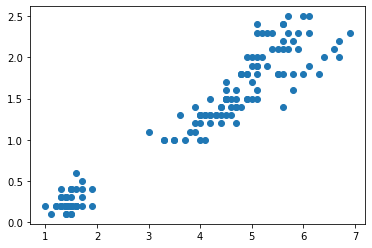

In [101]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])


In [102]:
from sklearn.cluster import KMeans

In [103]:
km = KMeans(3)
km

KMeans(n_clusters=3)

In [104]:
# predict which cluster each point fits
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [105]:
df['cluster_no']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster_no
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [106]:
# create a table for each cluster
df1 = df[df.cluster_no==0]
df2 = df[df.cluster_no==1]
df3= df[df.cluster_no==2]

In [107]:
df1.head()

,petal length (cm),petal width (cm),cluster_no
50,4.7,1.4,0
51,4.5,1.5,0
52,4.9,1.5,0
53,4.0,1.3,0
54,4.6,1.5,0


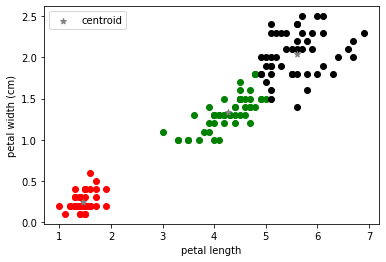

In [108]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='grey',marker='*',label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width (cm)')
plt.legend()

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])

MinMaxScaler()

In [111]:
df.head()

,petal length (cm),petal width (cm),cluster_no
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [112]:
df[['petal length (cm)']] = scaler.transform(df[['petal length (cm)']])

In [113]:
df.head()

,petal length (cm),petal width (cm),cluster_no
0,0.067797,0.2,1
1,0.067797,0.2,1
2,0.050847,0.2,1
3,0.084746,0.2,1
4,0.067797,0.2,1


In [114]:
scaler = MinMaxScaler()
scaler.fit(df[['petal width (cm)']])
df[['petal width (cm)']] = scaler.transform(df[['petal width (cm)']])
df.head()

,petal length (cm),petal width (cm),cluster_no
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [115]:
# classify again as the values have been changed consequently clusters have changed
km = KMeans(3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
# df['cluster_no']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster_no
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [116]:
# create a table for each cluster
df1 = df[df.cluster_no==0]
df2 = df[df.cluster_no==1]
df3= df[df.cluster_no==2]

In [117]:
df1.head()

,petal length (cm),petal width (cm),cluster_no
50,0.627119,0.541667,0
51,0.593220,0.583333,0
52,0.661017,0.583333,0
53,0.508475,0.500000,0
54,0.610169,0.583333,0


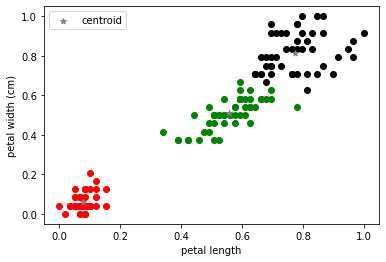

In [118]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='grey',marker='*',label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width (cm)')
plt.legend()

In [120]:
k_range = range(1,10)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    #get error and append
    sse.append(km.inertia_)

C:\Users\mpate\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [121]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6798101576314028,
 0.5656776810037092,
 0.4880262556573532,
 0.42544198335229505]

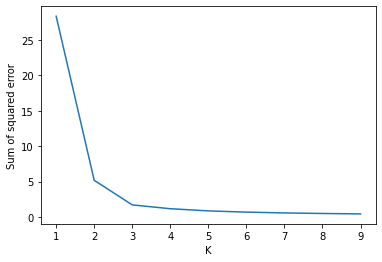

In [122]:
# look for elbow and it is on 3
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)